tgb - 10/2/2019 - This notebook aims at developing python script to automatize the calculation of the moist margin's length over 18 years of reanalysis data. Heavily inspired from https://github.com/tbeucler/2019_WMI/blob/master/dev/tbeucler/007_Select_ITCZ_cases.ipynb

In [ ]:
# Choose year over which to calculate the contour length
year = 2010

In [3]:
# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import datetime
from skimage import measure
from scipy import ndimage
import scipy.integrate as sin
from scipy.optimize import curve_fit

import pickle
import sys

In [4]:
# Open MSE dataset
path = '/nfs/twcroninlab002/tbeucler/ERA5/ERA5_LHF_SHF/'
MSE = xr.open_mfdataset(path+'????/??MSE.nc',combine='by_coords')

ValueError: cannot reshape array of size 120579744 into shape (744,721,1440)

In [9]:
# Restrict to Tropical Atlantic MSE field
dx = 110/4 #km
dt = 3600
tcoor = dt*np.arange(0,MSE.time.shape[0])
latmin = -30
latmax = 30
lonmin = 300
lonmax = 360

MSEAtl = MSE['p62.162'].sel({'longitude':slice(lonmin,lonmax),'latitude':slice(latmax,latmin)})
lonAtl = MSE.longitude.sel({'longitude':slice(lonmin,lonmax)})
latAtl = MSE.latitude.sel({'latitude':slice(latmax,latmin)})

In [10]:
# Array containing all years from 2000 to 2018
YEAR = np.linspace(2000,2018,19).astype(int)

In [12]:
# Load median to define the moist margin
path_PKL = '/nfs/twcroninlab002/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
hf = open(path_PKL+'10_1_MED.pkl','rb')
MED_data = pickle.load(hf)

In [14]:
# Find index of a given date
def index_date(time_array,date_string):
    return [i for i, x in enumerate(time_array.sel({'time':date_string})==time_array) if x]

In [27]:
# Iterate over years to calculate total contour length
L_CONTOUR = {}
it_tot = 0
print('year=',year)
date1 = str(year)+'-01-01T00:00:00'
date2 = str(year)+'-12-31T23:00:00'
it_tot = index_date(MSEAtl.time,date1)[0]
Nt = MSEAtl.time.sel({'time':slice(date1,date2)}).shape[0]
L_CONTOUR[str(year)] = np.zeros((Nt,))
for it in range(Nt):
    print('it=',it,' & it_tot=',it_tot,'               ',end='\r')
    Contour = curve.get_contours(MSEAtl[it_tot,:,:]>MED_data['Median_MSE'][str(year)][it])
    L = 0
    for j,contour in enumerate(Contour):
        plt.plot(lonAtl[contour[:,1].astype(int)],latAtl[contour[:,0].astype(int)],color='k')
        L += np.sum(contour*dx)
    L_CONTOUR[str(year)][it] = L
    it_tot+=1

year= 2010


KeyboardInterrupt: 

In [26]:
# Save the contour length in a pickle file
hf = open(path_PKL+'10_2_CONTOURL'+str(year)+'.pkl','wb')
CONdata = {"Tot_Contour_km":L_CONTOUR,"time":MSEAtl.time}
pickle.dump(CONdata,hf)
hf.close()

In [6]:
# Choose year over which to calculate the contour length
year = 2010

# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import datetime
from skimage import measure
from scipy import ndimage
import scipy.integrate as sin
from scipy.optimize import curve_fit

import pickle
import sys

# Open MSE dataset
path = '/nfs/twcroninlab002/tbeucler/ERA5/ERA5_LHF_SHF/'
MSE = xr.open_mfdataset(path+'????/??MSE.nc',combine='by_coords')

# Restrict to Tropical Atlantic MSE field
dx = 110/4 #km
dt = 3600
tcoor = dt*np.arange(0,MSE.time.shape[0])
latmin = -30
latmax = 30
lonmin = 300
lonmax = 360

MSEAtl = MSE['p62.162'].sel({'longitude':slice(lonmin,lonmax),'latitude':slice(latmax,latmin)})
lonAtl = MSE.longitude.sel({'longitude':slice(lonmin,lonmax)})
latAtl = MSE.latitude.sel({'latitude':slice(latmax,latmin)})

# Array containing all years from 2000 to 2018
YEAR = np.linspace(2000,2018,19).astype(int)

# Load median to define the moist margin
path_PKL = '/nfs/twcroninlab002/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
hf = open(path_PKL+'10_1_MED.pkl','rb')
MED_data = pickle.load(hf)

# Find index of a given date
def index_date(time_array,date_string):
    return [i for i, x in enumerate(time_array.sel({'time':date_string})==time_array) if x]

# Iterate over years to calculate total contour length
L_CONTOUR = {}
it_tot = 0
print('year=',year)
date1 = str(year)+'-01-01T00:00:00'
date2 = str(year)+'-12-31T23:00:00'
it_tot = index_date(MSEAtl.time,date1)[0]
Nt = MSEAtl.time.sel({'time':slice(date1,date2)}).shape[0]
L_CONTOUR[str(year)] = np.zeros((Nt,))
for it in range(Nt):
    print('it=',it,' & it_tot=',it_tot,'               ',end='\r')
    Contour = curve.get_contours(MSEAtl[it_tot,:,:]>MED_data['Median_MSE'][str(year)][it])
    L = 0
    for j,contour in enumerate(Contour):
        #plt.plot(lonAtl[contour[:,1].astype(int)],latAtl[contour[:,0].astype(int)],color='k')
        L += np.sum(contour*dx)
    L_CONTOUR[str(year)][it] = L
    it_tot+=1
    process = psutil.Process(os.getpid())
    print(process.memory_info().rss/1e9)  # in Gbytes 
    
# Save the contour length in a pickle file
hf = open(path_PKL+'10_2_CONTOURL'+str(year)+'.pkl','wb')
CONdata = {"Tot_Contour_km":L_CONTOUR,"time":MSEAtl.time}
pickle.dump(CONdata,hf)
hf.close()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
year= 2010
0.706772992_tot= 87672                
0.707211264_tot= 87673                
0.707448832_tot= 87674                
0.707862528_tot= 87675                
0.707940352_tot= 87676                
0.708284416_tot= 87677                
0.708460544_tot= 87678                
0.708517888_tot= 87679         

0.708816896it_tot= 87862                
0.708816896it_tot= 87863                
0.708816896it_tot= 87864                
0.708816896it_tot= 87865                
0.708816896it_tot= 87866                
0.708816896it_tot= 87867                
0.708816896it_tot= 87868                
0.708816896it_tot= 87869                
0.708816896it_tot= 87870                
0.708816896it_tot= 87871                
0.708816896it_tot= 87872                
0.708816896it_tot= 87873                
0.708816896it_tot= 87874                
0.708816896it_tot= 87875                
0.708816896it_tot= 87876                
0.708816896it_tot= 87877                
0.708816896it_tot= 87878                
0.708816896it_tot= 87879                
0.708816896it_tot= 87880                
0.708816896it_tot= 87881                
0.708816896it_tot= 87882                
0.708816896it_tot= 87883                
0.708816896it_tot= 87884                
0.708816896it_tot= 87885                
0.708816896it_to

0.81094656 it_tot= 88064                
0.811757568it_tot= 88065                
0.81229824 it_tot= 88066                
0.813109248it_tot= 88067                
0.813907968it_tot= 88068                
0.814718976it_tot= 88069                
0.815259648it_tot= 88070                
0.816070656it_tot= 88071                
0.81686528 it_tot= 88072                
0.817405952it_tot= 88073                
0.818208768it_tot= 88074                
0.81874944 it_tot= 88075                
0.81954816 it_tot= 88076                
0.820088832it_tot= 88077                
0.820629504it_tot= 88078                
0.821170176it_tot= 88079                
0.821977088it_tot= 88080                
0.82251776 it_tot= 88081                
0.823058432it_tot= 88082                
0.82386944 it_tot= 88083                
0.824406016it_tot= 88084                
0.825217024it_tot= 88085                
0.8257536& it_tot= 88086                
0.826564608it_tot= 88087                
0.827367424it_to

0.956706816it_tot= 88274                
0.957247488it_tot= 88275                
0.958046208it_tot= 88276                
0.958857216it_tot= 88277                
0.959660032it_tot= 88278                
0.96047104 it_tot= 88279                
0.96124928 it_tot= 88280                
0.962060288it_tot= 88281                
0.962871296it_tot= 88282                
0.963411968it_tot= 88283                
0.964214784it_tot= 88284                
0.965025792it_tot= 88285                
0.965566464it_tot= 88286                
0.966094848it_tot= 88287                
0.966631424it_tot= 88288                
0.967442432it_tot= 88289                
0.967970816it_tot= 88290                
0.968781824it_tot= 88291                
0.96958464 it_tot= 88292                
0.970395648it_tot= 88293                
0.97093632 it_tot= 88294                
0.971747328it_tot= 88295                
0.972443648it_tot= 88296                
0.973254656it_tot= 88297                
0.974065664it_to

1.096749056it_tot= 88475                
1.097285632it_tot= 88476                
1.09809664 it_tot= 88477                
1.098907648it_tot= 88478                
1.099718656it_tot= 88479                
1.100255232it_tot= 88480                
1.10106624 it_tot= 88481                
1.101869056it_tot= 88482                
1.102680064it_tot= 88483                
1.10348288 it_tot= 88484                
1.104293888it_tot= 88485                
1.105096704it_tot= 88486                
1.105637376it_tot= 88487                
1.106173952it_tot= 88488                
1.10698496 it_tot= 88489                
1.107787776it_tot= 88490                
1.108328448it_tot= 88491                
1.108865024it_tot= 88492                
1.109676032it_tot= 88493                
1.110216704it_tot= 88494                
1.110757376it_tot= 88495                
1.111293952it_tot= 88496                
1.11210496 it_tot= 88497                
1.112911872it_tot= 88498                
1.113452544it_to

1.238859776 it_tot= 88679                
1.2396544 & it_tot= 88680                
1.240457216 it_tot= 88681                
1.241260032 it_tot= 88682                
1.241796608 it_tot= 88683                
1.242324992 it_tot= 88684                
1.242861568 it_tot= 88685                
1.243385856 it_tot= 88686                
1.244188672 it_tot= 88687                
1.244987392 it_tot= 88688                
1.245765632 it_tot= 88689                
1.246306304 it_tot= 88690                
1.246846976 it_tot= 88691                
1.247645696 it_tot= 88692                
1.248456704 it_tot= 88693                
1.249267712 it_tot= 88694                
1.25007872& it_tot= 88695                
1.250885632 it_tot= 88696                
1.251426304 it_tot= 88697                
1.25196288& it_tot= 88698                
1.252503552 it_tot= 88699                
1.253310464 it_tot= 88700                
1.254121472 it_tot= 88701                
1.254662144 it_tot= 88702         

1.38387456& it_tot= 88888                
1.384685568 it_tot= 88889                
1.38522624& it_tot= 88890                
1.386037248 it_tot= 88891                
1.386573824 it_tot= 88892                
1.387384832 it_tot= 88893                
1.388187648 it_tot= 88894                
1.38872832& it_tot= 88895                
1.389535232 it_tot= 88896                
1.39034624& it_tot= 88897                
1.390886912 it_tot= 88898                
1.39169792& it_tot= 88899                
1.39249664& it_tot= 88900                
1.393037312 it_tot= 88901                
1.393844224 it_tot= 88902                
1.394384896 it_tot= 88903                
1.395183616 it_tot= 88904                
1.395994624 it_tot= 88905                
1.396801536 it_tot= 88906                
1.397612544 it_tot= 88907                
1.398419456 it_tot= 88908                
1.398960128 it_tot= 88909                
1.3995008 & it_tot= 88910                
1.400311808 it_tot= 88911         

1.524719616 it_tot= 89090                
1.525530624 it_tot= 89091                
1.5260672 & it_tot= 89092                
1.526878208 it_tot= 89093                
1.52768512& it_tot= 89094                
1.528496128 it_tot= 89095                
1.529294848 it_tot= 89096                
1.530105856 it_tot= 89097                
1.530646528 it_tot= 89098                
1.5311872 & it_tot= 89099                
1.531994112 it_tot= 89100                
1.532534784 it_tot= 89101                
1.533345792 it_tot= 89102                
1.533886464 it_tot= 89103                
1.534693376 it_tot= 89104                
1.535234048 it_tot= 89105                
1.53577472& it_tot= 89106                
1.536315392 it_tot= 89107                
1.537122304 it_tot= 89108                
1.537933312 it_tot= 89109                
1.53874432& it_tot= 89110                
1.539555328 it_tot= 89111                
1.540091904 it_tot= 89112                
1.540902912 it_tot= 89113         

1.665839104 it_tot= 89292                
1.666379776 it_tot= 89293                
1.666920448 it_tot= 89294                
1.66746112& it_tot= 89295                
1.667997696 it_tot= 89296                
1.668538368 it_tot= 89297                
1.669054464 it_tot= 89298                
1.669865472 it_tot= 89299                
1.670668288 it_tot= 89300                
1.671479296 it_tot= 89301                
1.672019968 it_tot= 89302                
1.672830976 it_tot= 89303                
1.673633792 it_tot= 89304                
1.6744448 & it_tot= 89305                
1.675247616 it_tot= 89306                
1.676058624 it_tot= 89307                
1.676857344 it_tot= 89308                
1.677398016 it_tot= 89309                
1.677938688 it_tot= 89310                
1.678749696 it_tot= 89311                
1.679556608 it_tot= 89312                
1.68009728& it_tot= 89313                
1.680900096 it_tot= 89314                
1.681440768 it_tot= 89315         

1.80271104& it_tot= 89489                
1.803251712 it_tot= 89490                
1.80406272& it_tot= 89491                
1.804865536 it_tot= 89492                
1.805676544 it_tot= 89493                
1.806217216 it_tot= 89494                
1.807028224 it_tot= 89495                
1.8075648 & it_tot= 89496                
1.808375808 it_tot= 89497                
1.808912384 it_tot= 89498                
1.809453056 it_tot= 89499                
1.810259968 it_tot= 89500                
1.811070976 it_tot= 89501                
1.811611648 it_tot= 89502                
1.81215232& it_tot= 89503                
1.812955136 it_tot= 89504                
1.813495808 it_tot= 89505                
1.814298624 it_tot= 89506                
1.815109632 it_tot= 89507                
1.815916544 it_tot= 89508                
1.816727552 it_tot= 89509                
1.817268224 it_tot= 89510                
1.817808896 it_tot= 89511                
1.818611712 it_tot= 89512         

1.947676672 it_tot= 89696                
1.948217344 it_tot= 89697                
1.948758016 it_tot= 89698                
1.949569024 it_tot= 89699                
1.9501056 & it_tot= 89700                
1.950646272 it_tot= 89701                
1.951453184 it_tot= 89702                
1.952264192 it_tot= 89703                
1.953062912 it_tot= 89704                
1.953603584 it_tot= 89705                
1.954414592 it_tot= 89706                
1.9552256 & it_tot= 89707                
1.956028416 it_tot= 89708                
1.956569088 it_tot= 89709                
1.957380096 it_tot= 89710                
1.958187008 it_tot= 89711                
1.958723584 it_tot= 89712                
1.959534592 it_tot= 89713                
1.960075264 it_tot= 89714                
1.960886272 it_tot= 89715                
1.961422848 it_tot= 89716                
1.96196352& it_tot= 89717                
1.962496  & it_tot= 89718                
1.963307008 it_tot= 89719         

2.08457728& it_tot= 89894                
2.085388288 it_tot= 89895                
2.086191104 it_tot= 89896                
2.087002112 it_tot= 89897                
2.087800832 it_tot= 89898                
2.088341504 it_tot= 89899                
2.089140224 it_tot= 89900                
2.089951232 it_tot= 89901                
2.090754048 it_tot= 89902                
2.09129472& it_tot= 89903                
2.092097536 it_tot= 89904                
2.092883968 it_tot= 89905                
2.09342464& it_tot= 89906                
2.093965312 it_tot= 89907                
2.094501888 it_tot= 89908                
2.095312896 it_tot= 89909                
2.095853568 it_tot= 89910                
2.09639424& it_tot= 89911                
2.096930816 it_tot= 89912                
2.097741824 it_tot= 89913                
2.098282496 it_tot= 89914                
2.098814976 it_tot= 89915                
2.099621888 it_tot= 89916                
2.100432896 it_tot= 89917         

2.222338048 it_tot= 90092                
2.223149056 it_tot= 90093                
2.223960064 it_tot= 90094                
2.224500736 it_tot= 90095                
2.225303552 it_tot= 90096                
2.225844224 it_tot= 90097                
2.226651136 it_tot= 90098                
2.227191808 it_tot= 90099                
2.227990528 it_tot= 90100                
2.228801536 it_tot= 90101                
2.229604352 it_tot= 90102                
2.23041536& it_tot= 90103                
2.23121408& it_tot= 90104                
2.232025088 it_tot= 90105                
2.23256576& it_tot= 90106                
2.233376768 it_tot= 90107                
2.233913344 it_tot= 90108                
2.234724352 it_tot= 90109                
2.235240448 it_tot= 90110                
2.23578112& it_tot= 90111                
2.236317696 it_tot= 90112                
2.236858368 it_tot= 90113                
2.23739904& it_tot= 90114                
2.237939712 it_tot= 90115         

2.359304192 it_tot= 90288                
2.359943168 it_tot= 90289                
2.360631296 it_tot= 90290                
2.361167872 it_tot= 90291                
2.361966592 it_tot= 90292                
2.3627776 & it_tot= 90293                
2.363469824 it_tot= 90294                
2.364010496 it_tot= 90295                
2.364547072 it_tot= 90296                
2.36535808& it_tot= 90297                
2.36589056& it_tot= 90298                
2.366427136 it_tot= 90299                
2.366963712 it_tot= 90300                
2.36777472& it_tot= 90301                
2.368397312 it_tot= 90302                
2.368937984 it_tot= 90303                
2.369540096 it_tot= 90304                
2.370351104 it_tot= 90305                
2.371162112 it_tot= 90306                
2.37197312& it_tot= 90307                
2.372784128 it_tot= 90308                
2.373595136 it_tot= 90309                
2.374397952 it_tot= 90310                
2.37520896& it_tot= 90311         

2.494509056 it_tot= 90484                
2.495320064 it_tot= 90485                
2.496126976 it_tot= 90486                
2.496937984 it_tot= 90487                
2.497744896 it_tot= 90488                
2.498555904 it_tot= 90489                
2.49935872& it_tot= 90490                
2.500169728 it_tot= 90491                
2.500706304 it_tot= 90492                
2.501246976 it_tot= 90493                
2.502049792 it_tot= 90494                
2.502590464 it_tot= 90495                
2.50312704& it_tot= 90496                
2.503667712 it_tot= 90497                
2.504208384 it_tot= 90498                
2.504749056 it_tot= 90499                
2.505285632 it_tot= 90500                
2.505826304 it_tot= 90501                
2.50662912& it_tot= 90502                
2.507440128 it_tot= 90503                
2.507976704 it_tot= 90504                
2.508787712 it_tot= 90505                
2.50959872& it_tot= 90506                
2.510409728 it_tot= 90507         

2.63278592& it_tot= 90682                
2.633596928 it_tot= 90683                
2.634125312 it_tot= 90684                
2.63493632& it_tot= 90685                
2.635747328 it_tot= 90686                
2.636558336 it_tot= 90687                
2.63735296& it_tot= 90688                
2.638163968 it_tot= 90689                
2.63870464& it_tot= 90690                
2.639245312 it_tot= 90691                
2.639781888 it_tot= 90692                
2.64032256& it_tot= 90693                
2.641125376 it_tot= 90694                
2.641911808 it_tot= 90695                
2.642448384 it_tot= 90696                
2.643259392 it_tot= 90697                
2.643795968 it_tot= 90698                
2.64433664& it_tot= 90699                
2.645139456 it_tot= 90700                
2.645925888 it_tot= 90701                
2.646663168 it_tot= 90702                
2.647474176 it_tot= 90703                
2.648281088 it_tot= 90704                
2.648813568 it_tot= 90705         

2.775658496 it_tot= 90888                
2.776199168 it_tot= 90889                
2.776735744 it_tot= 90890                
2.777546752 it_tot= 90891                
2.778079232 it_tot= 90892                
2.77889024& it_tot= 90893                
2.779430912 it_tot= 90894                
2.780512256 it_tot= 90895                
2.781048832 it_tot= 90896                
2.781589504 it_tot= 90897                
2.78239232& it_tot= 90898                
2.782908416 it_tot= 90899                
2.783715328 it_tot= 90900                
2.784526336 it_tot= 90901                
2.785329152 it_tot= 90902                
2.785869824 it_tot= 90903                
2.786676736 it_tot= 90904                
2.787487744 it_tot= 90905                
2.78829056& it_tot= 90906                
2.789101568 it_tot= 90907                
2.789638144 it_tot= 90908                
2.790514688 it_tot= 90909                
2.791612416 it_tot= 90910                
2.792431616 it_tot= 90911         

2.914258944 it_tot= 91088                
2.914799616 it_tot= 91089                
2.915602432 it_tot= 91090                
2.91641344& it_tot= 91091                
2.916896768 it_tot= 91092                
2.91743744& it_tot= 91093                
2.918248448 it_tot= 91094                
2.919059456 it_tot= 91095                
2.919596032 it_tot= 91096                
2.92040704& it_tot= 91097                
2.921218048 it_tot= 91098                
2.922029056 it_tot= 91099                
2.922831872 it_tot= 91100                
2.923372544 it_tot= 91101                
2.923913216 it_tot= 91102                
2.924716032 it_tot= 91103                
2.925518848 it_tot= 91104                
2.926329856 it_tot= 91105                
2.927136768 it_tot= 91106                
2.927947776 it_tot= 91107                
2.928750592 it_tot= 91108                
2.929553408 it_tot= 91109                
2.930364416 it_tot= 91110                
2.931175424 it_tot= 91111         

3.052146688 it_tot= 91286                
3.05268736& it_tot= 91287                
3.053490176 it_tot= 91288                
3.054301184 it_tot= 91289                
3.055104  & it_tot= 91290                
3.05563648& it_tot= 91291                
3.056173056 it_tot= 91292                
3.056984064 it_tot= 91293                
3.057524736 it_tot= 91294                
3.058335744 it_tot= 91295                
3.059105792 it_tot= 91296                
3.0599168 & it_tot= 91297                
3.060453376 it_tot= 91298                
3.060994048 it_tot= 91299                
3.06153472& it_tot= 91300                
3.062345728 it_tot= 91301                
3.063148544 it_tot= 91302                
3.063959552 it_tot= 91303                
3.064762368 it_tot= 91304                
3.06530304& it_tot= 91305                
3.065839616 it_tot= 91306                
3.066650624 it_tot= 91307                
3.067449344 it_tot= 91308                
3.068260352 it_tot= 91309         

3.197054976 it_tot= 91493                
3.197595648 it_tot= 91494                
3.198246912 it_tot= 91495                
3.199045632 it_tot= 91496                
3.199848448 it_tot= 91497                
3.200643072 it_tot= 91498                
3.201449984 it_tot= 91499                
3.202248704 it_tot= 91500                
3.202781184 it_tot= 91501                
3.203579904 it_tot= 91502                
3.20438272& it_tot= 91503                
3.205185536 it_tot= 91504                
3.205963776 it_tot= 91505                
3.206774784 it_tot= 91506                
3.207315456 it_tot= 91507                
3.208073216 it_tot= 91508                
3.208613888 it_tot= 91509                
3.20923648& it_tot= 91510                
3.210047488 it_tot= 91511                
3.210584064 it_tot= 91512                
3.211390976 it_tot= 91513                
3.211931648 it_tot= 91514                
3.21273856& it_tot= 91515                
3.213275136 it_tot= 91516         

3.336609792 it_tot= 91694                
3.337302016 it_tot= 91695                
3.338108928 it_tot= 91696                
3.338919936 it_tot= 91697                
3.339456512 it_tot= 91698                
3.34026752& it_tot= 91699                
3.340804096 it_tot= 91700                
3.341615104 it_tot= 91701                
3.34241792& it_tot= 91702                
3.342958592 it_tot= 91703                
3.343495168 it_tot= 91704                
3.344039936 it_tot= 91705                
3.344572416 it_tot= 91706                
3.345113088 it_tot= 91707                
3.345926  & it_tot= 91708                
3.346460672 it_tot= 91709                
3.347263488 it_tot= 91710                
3.34780416& it_tot= 91711                
3.348340736 it_tot= 91712                
3.349151744 it_tot= 91713                
3.349962752 it_tot= 91714                
3.35077376& it_tot= 91715                
3.351580672 it_tot= 91716                
3.35239168& it_tot= 91717         

3.476934656 it_tot= 91896                
3.477475328 it_tot= 91897                
3.478286336 it_tot= 91898                
3.478827008 it_tot= 91899                
3.47963392& it_tot= 91900                
3.480174592 it_tot= 91901                
3.480690688 it_tot= 91902                
3.481501696 it_tot= 91903                
3.482308608 it_tot= 91904                
3.48284928& it_tot= 91905                
3.483385856 it_tot= 91906                
3.484196864 it_tot= 91907                
3.48473344& it_tot= 91908                
3.485544448 it_tot= 91909                
3.486081024 it_tot= 91910                
3.486892032 it_tot= 91911                
3.487686656 it_tot= 91912                
3.488497664 it_tot= 91913                
3.489308672 it_tot= 91914                
3.49011968& it_tot= 91915                
3.490926592 it_tot= 91916                
3.491467264 it_tot= 91917                
3.49227008& it_tot= 91918                
3.492810752 it_tot= 91919         

3.621380096 it_tot= 92104                
3.622191104 it_tot= 92105                
3.623002112 it_tot= 92106                
3.623542784 it_tot= 92107                
3.62407936& it_tot= 92108                
3.624620032 it_tot= 92109                
3.625160704 it_tot= 92110                
3.625701376 it_tot= 92111                
3.626508288 it_tot= 92112                
3.627319296 it_tot= 92113                
3.628122112 it_tot= 92114                
3.628662784 it_tot= 92115                
3.629461504 it_tot= 92116                
3.630272512 it_tot= 92117                
3.631050752 it_tot= 92118                
3.63186176& it_tot= 92119                
3.632668672 it_tot= 92120                
3.63347968& it_tot= 92121                
3.63401216& it_tot= 92122                
3.634823168 it_tot= 92123                
3.635359744 it_tot= 92124                
3.636170752 it_tot= 92125                
3.636711424 it_tot= 92126                
3.637252096 it_tot= 92127         

3.762118656 it_tot= 92305                
3.762659328 it_tot= 92306                
3.763235  & it_tot= 92307                
3.764006912 it_tot= 92308                
3.764547584 it_tot= 92309                
3.7653504 & it_tot= 92310                
3.765891072 it_tot= 92311                
3.766427648 it_tot= 92312                
3.76696832& it_tot= 92313                
3.767775232 it_tot= 92314                
3.768315904 it_tot= 92315                
3.769122816 it_tot= 92316                
3.769933824 it_tot= 92317                
3.77073664& it_tot= 92318                
3.771547648 it_tot= 92319                
3.772084224 it_tot= 92320                
3.772850176 it_tot= 92321                
3.773652992 it_tot= 92322                
3.774464  & it_tot= 92323                
3.775266816 it_tot= 92324                
3.776077824 it_tot= 92325                
3.77688064& it_tot= 92326                
3.777691648 it_tot= 92327                
3.778228224 it_tot= 92328         

3.898679296 it_tot= 92502                
3.899490304 it_tot= 92503                
3.90002688& it_tot= 92504                
3.900567552 it_tot= 92505                
3.901108224 it_tot= 92506                
3.901919232 it_tot= 92507                
3.902717952 it_tot= 92508                
3.90352896& it_tot= 92509                
3.904331776 it_tot= 92510                
3.905142784 it_tot= 92511                
3.905949696 it_tot= 92512                
3.906490368 it_tot= 92513                
3.907293184 it_tot= 92514                
3.908104192 it_tot= 92515                
3.908902912 it_tot= 92516                
3.909443584 it_tot= 92517                
3.909984256 it_tot= 92518                
3.910795264 it_tot= 92519                
3.911593984 it_tot= 92520                
3.912134656 it_tot= 92521                
3.912945664 it_tot= 92522                
3.913756672 it_tot= 92523                
3.914555392 it_tot= 92524                
3.915096064 it_tot= 92525         

4.044382208 it_tot= 92711                
4.044894208 it_tot= 92712                
4.045705216 it_tot= 92713                
4.046483456 it_tot= 92714                
4.047024128 it_tot= 92715                
4.04783104& it_tot= 92716                
4.048642048 it_tot= 92717                
4.04918272& it_tot= 92718                
4.049723392 it_tot= 92719                
4.050259968 it_tot= 92720                
4.051070976 it_tot= 92721                
4.051873792 it_tot= 92722                
4.052414464 it_tot= 92723                
4.053204992 it_tot= 92724                
4.054016  & it_tot= 92725                
4.054556672 it_tot= 92726                
4.055097344 it_tot= 92727                
4.055896064 it_tot= 92728                
4.056707072 it_tot= 92729                
4.057505792 it_tot= 92730                
4.0583168 & it_tot= 92731                
4.059127808 it_tot= 92732                
4.059938816 it_tot= 92733                
4.060479488 it_tot= 92734         

4.183134208 it_tot= 92910                
4.183969792 it_tot= 92911                
4.184686592 it_tot= 92912                
4.185542656 it_tot= 92913                
4.186423296 it_tot= 92914                
4.187332608 it_tot= 92915                
4.188147712 it_tot= 92916                
4.189151232 it_tot= 92917                
4.190130176 it_tot= 92918                
4.190564352 it_tot= 92919                
4.191141888 it_tot= 92920                
4.191768576 it_tot= 92921                
4.192231424 it_tot= 92922                
4.192841728 it_tot= 92923                
4.19342336& it_tot= 92924                
4.193980416 it_tot= 92925                
4.194627584 it_tot= 92926                
4.195315712 it_tot= 92927                
4.195790848 it_tot= 92928                
4.19651584& it_tot= 92929                
4.197322752 it_tot= 92930                
4.197863424 it_tot= 92931                
4.198670336 it_tot= 92932                
4.199211008 it_tot= 92933         

4.31939584& it_tot= 93106                
4.320206848 it_tot= 93107                
4.320743424 it_tot= 93108                
4.321554432 it_tot= 93109                
4.322095104 it_tot= 93110                
4.322906112 it_tot= 93111                
4.323704832 it_tot= 93112                
4.324245504 it_tot= 93113                
4.324786176 it_tot= 93114                
4.325597184 it_tot= 93115                
4.32613376& it_tot= 93116                
4.326674432 it_tot= 93117                
4.32748544& it_tot= 93118                
4.328296448 it_tot= 93119                
4.329091072 it_tot= 93120                
4.329631744 it_tot= 93121                
4.330172416 it_tot= 93122                
4.330983424 it_tot= 93123                
4.33178624& it_tot= 93124                
4.332326912 it_tot= 93125                
4.33313792& it_tot= 93126                
4.333985792 it_tot= 93127                
4.334784512 it_tot= 93128                
4.335325184 it_tot= 93129         

4.465225728 it_tot= 93316                
4.4657664 & it_tot= 93317                
4.466307072 it_tot= 93318                
4.46711808& it_tot= 93319                
4.468248576 it_tot= 93320                
4.468985856 it_tot= 93321                
4.469788672 it_tot= 93322                
4.470304768 it_tot= 93323                
4.471103488 it_tot= 93324                
4.471914496 it_tot= 93325                
4.472451072 it_tot= 93326                
4.473257984 it_tot= 93327                
4.474064896 it_tot= 93328                
4.474605568 it_tot= 93329                
4.475215872 it_tot= 93330                
4.47602688& it_tot= 93331                
4.4768256 & it_tot= 93332                
4.477636608 it_tot= 93333                
4.47817728& it_tot= 93334                
4.478717952 it_tot= 93335                
4.479520768 it_tot= 93336                
4.48006144& it_tot= 93337                
4.480602112 it_tot= 93338                
4.481409024 it_tot= 93339         

4.6012416 & it_tot= 93512                
4.601782272 it_tot= 93513                
4.60259328& it_tot= 93514                
4.603404288 it_tot= 93515                
4.603940864 it_tot= 93516                
4.604481536 it_tot= 93517                
4.605284352 it_tot= 93518                
4.605825024 it_tot= 93519                
4.606631936 it_tot= 93520                
4.607442944 it_tot= 93521                
4.608241664 it_tot= 93522                
4.609052672 it_tot= 93523                
4.609589248 it_tot= 93524                
4.61012992& it_tot= 93525                
4.610932736 it_tot= 93526                
4.611743744 it_tot= 93527                
4.61254656& it_tot= 93528                
4.613357568 it_tot= 93529                
4.614168576 it_tot= 93530                
4.614979584 it_tot= 93531                
4.6157824 & it_tot= 93532                
4.616323072 it_tot= 93533                
4.617101312 it_tot= 93534                
4.61791232& it_tot= 93535         

4.7379456 & it_tot= 93708                
4.738486272 it_tot= 93709                
4.739026944 it_tot= 93710                
4.739837952 it_tot= 93711                
4.740374528 it_tot= 93712                
4.741185536 it_tot= 93713                
4.741992448 it_tot= 93714                
4.74253312& it_tot= 93715                
4.743069696 it_tot= 93716                
4.743880704 it_tot= 93717                
4.744691712 it_tot= 93718                
4.74550272& it_tot= 93719                
4.746305536 it_tot= 93720                
4.747116544 it_tot= 93721                
4.747927552 it_tot= 93722                
4.748468224 it_tot= 93723                
4.7490048 & it_tot= 93724                
4.749815808 it_tot= 93725                
4.75062272& it_tot= 93726                
4.751163392 it_tot= 93727                
4.751970304 it_tot= 93728                
4.752510976 it_tot= 93729                
4.753047552 it_tot= 93730                
4.753588224 it_tot= 93731         

4.878667776 it_tot= 93910                
4.879478784 it_tot= 93911                
4.880285696 it_tot= 93912                
4.88085504& it_tot= 93913                
4.881293312 it_tot= 93914                
4.88210432& it_tot= 93915                
4.88290304& it_tot= 93916                
4.883714048 it_tot= 93917                
4.88425472& it_tot= 93918                
4.884795392 it_tot= 93919                
4.885331968 it_tot= 93920                
4.88587264& it_tot= 93921                
4.886679552 it_tot= 93922                
4.88749056& it_tot= 93923                
4.888297472 it_tot= 93924                
4.888838144 it_tot= 93925                
4.889378816 it_tot= 93926                
4.889919488 it_tot= 93927                
4.890722304 it_tot= 93928                
4.891553792 it_tot= 93929                
4.892360704 it_tot= 93930                
4.893171712 it_tot= 93931                
4.893708288 it_tot= 93932                
4.89424896& it_tot= 93933         

5.022306304 it_tot= 94117                
5.023113216 it_tot= 94118                
5.023629312 it_tot= 94119                
5.024161792 it_tot= 94120                
5.024702464 it_tot= 94121                
5.02523904& it_tot= 94122                
5.026050048 it_tot= 94123                
5.02685696& it_tot= 94124                
5.027667968 it_tot= 94125                
5.02820864& it_tot= 94126                
5.029019648 it_tot= 94127                
5.029818368 it_tot= 94128                
5.030621184 it_tot= 94129                
5.031428096 it_tot= 94130                
5.032239104 it_tot= 94131                
5.033046016 it_tot= 94132                
5.033586688 it_tot= 94133                
5.034389504 it_tot= 94134                
5.035200512 it_tot= 94135                
5.036007424 it_tot= 94136                
5.036548096 it_tot= 94137                
5.037088768 it_tot= 94138                
5.03762944& it_tot= 94139                
5.038166016 it_tot= 94140         

5.165965312 it_tot= 94324                
5.16677632& it_tot= 94325                
5.167587328 it_tot= 94326                
5.168398336 it_tot= 94327                
5.168934912 it_tot= 94328                
5.16974592& it_tot= 94329                
5.170548736 it_tot= 94330                
5.171359744 it_tot= 94331                
5.172166656 it_tot= 94332                
5.172977664 it_tot= 94333                
5.173764096 it_tot= 94334                
5.174575104 it_tot= 94335                
5.175382016 it_tot= 94336                
5.175922688 it_tot= 94337                
5.176725504 it_tot= 94338                
5.177266176 it_tot= 94339                
5.177802752 it_tot= 94340                
5.178343424 it_tot= 94341                
5.178875904 it_tot= 94342                
5.179686912 it_tot= 94343                
5.180215296 it_tot= 94344                
5.180755968 it_tot= 94345                
5.18129664& it_tot= 94346                
5.182107648 it_tot= 94347         

5.30182144& it_tot= 94520                
5.302632448 it_tot= 94521                
5.303435264 it_tot= 94522                
5.304246272 it_tot= 94523                
5.304782848 it_tot= 94524                
5.305593856 it_tot= 94525                
5.306134528 it_tot= 94526                
5.306945536 it_tot= 94527                
5.307482112 it_tot= 94528                
5.30829312& it_tot= 94529                
5.309100032 it_tot= 94530                
5.309640704 it_tot= 94531                
5.310173184 it_tot= 94532                
5.310984192 it_tot= 94533                
5.311787008 it_tot= 94534                
5.31232768& it_tot= 94535                
5.313130496 it_tot= 94536                
5.313941504 it_tot= 94537                
5.314748416 it_tot= 94538                
5.315289088 it_tot= 94539                
5.316087808 it_tot= 94540                
5.316898816 it_tot= 94541                
5.317705728 it_tot= 94542                
5.31849216& it_tot= 94543         

5.440032768 it_tot= 94717                
5.440835584 it_tot= 94718                
5.441376256 it_tot= 94719                
5.441912832 it_tot= 94720                
5.442531328 it_tot= 94721                
5.443334144 it_tot= 94722                
5.444145152 it_tot= 94723                
5.444947968 it_tot= 94724                
5.44548864& it_tot= 94725                
5.446291456 it_tot= 94726                
5.447102464 it_tot= 94727                
5.44763904& it_tot= 94728                
5.448450048 it_tot= 94729                
5.44925696& it_tot= 94730                
5.449797632 it_tot= 94731                
5.450334208 it_tot= 94732                
5.45087488& it_tot= 94733                
5.451411456 it_tot= 94734                
5.452222464 it_tot= 94735                
5.453017088 it_tot= 94736                
5.45355776& it_tot= 94737                
5.454360576 it_tot= 94738                
5.454901248 it_tot= 94739                
5.455704064 it_tot= 94740         

5.58096384& it_tot= 94920                
5.581504512 it_tot= 94921                
5.582307328 it_tot= 94922                
5.582848  & it_tot= 94923                
5.583384576 it_tot= 94924                
5.583925248 it_tot= 94925                
5.58473216& it_tot= 94926                
5.585272832 it_tot= 94927                
5.586079744 it_tot= 94928                
5.586620416 it_tot= 94929                
5.587152896 it_tot= 94930                
5.587963904 it_tot= 94931                
5.58850048& it_tot= 94932                
5.589311488 it_tot= 94933                
5.590114304 it_tot= 94934                
5.590925312 it_tot= 94935                
5.591461888 it_tot= 94936                
5.592272896 it_tot= 94937                
5.593079808 it_tot= 94938                
5.593890816 it_tot= 94939                
5.594697728 it_tot= 94940                
5.59548416& it_tot= 94941                
5.59628288& it_tot= 94942                
5.596823552 it_tot= 94943         

5.724819456 it_tot= 95127                
5.725626368 it_tot= 95128                
5.726437376 it_tot= 95129                
5.726978048 it_tot= 95130                
5.72751872& it_tot= 95131                
5.728055296 it_tot= 95132                
5.728595968 it_tot= 95133                
5.729398784 it_tot= 95134                
5.729939456 it_tot= 95135                
5.730746368 it_tot= 95136                
5.73128704& it_tot= 95137                
5.732098048 it_tot= 95138                
5.732909056 it_tot= 95139                
5.733715968 it_tot= 95140                
5.734526976 it_tot= 95141                
5.735329792 it_tot= 95142                
5.7361408 & it_tot= 95143                
5.736656896 it_tot= 95144                
5.737467904 it_tot= 95145                
5.73827072& it_tot= 95146                
5.739081728 it_tot= 95147                
5.739618304 it_tot= 95148                
5.740158976 it_tot= 95149                
5.740699648 it_tot= 95150         

5.86237952& it_tot= 95324                
5.863190528 it_tot= 95325                
5.863899136 it_tot= 95326                
5.864710144 it_tot= 95327                
5.865517056 it_tot= 95328                
5.866057728 it_tot= 95329                
5.86686464& it_tot= 95330                
5.867675648 it_tot= 95331                
5.868474368 it_tot= 95332                
5.869010944 it_tot= 95333                
5.869551616 it_tot= 95334                
5.870092288 it_tot= 95335                
5.870866432 it_tot= 95336                
5.871407104 it_tot= 95337                
5.871947776 it_tot= 95338                
5.872758784 it_tot= 95339                
5.873557504 it_tot= 95340                
5.874098176 it_tot= 95341                
5.874638848 it_tot= 95342                
5.875449856 it_tot= 95343                
5.876252672 it_tot= 95344                
5.87706368& it_tot= 95345                
5.877604352 it_tot= 95346                
5.87841536& it_tot= 95347         

6.005567488 it_tot= 95531                
6.0063744 & it_tot= 95532                
6.007185408 it_tot= 95533                
6.00799232& it_tot= 95534                
6.008803328 it_tot= 95535                
6.009339904 it_tot= 95536                
6.010150912 it_tot= 95537                
6.010691584 it_tot= 95538                
6.011502592 it_tot= 95539                
6.01229312& it_tot= 95540                
6.013104128 it_tot= 95541                
6.013906944 it_tot= 95542                
6.014447616 it_tot= 95543                
6.015254528 it_tot= 95544                
6.01575424& it_tot= 95545                
6.016557056 it_tot= 95546                
6.017097728 it_tot= 95547                
6.01790464& it_tot= 95548                
6.018445312 it_tot= 95549                
6.018985984 it_tot= 95550                
6.019526656 it_tot= 95551                
6.020063232 it_tot= 95552                
6.02087424& it_tot= 95553                
6.021414912 it_tot= 95554         

6.143275008 it_tot= 95727                
6.14408192& it_tot= 95728                
6.144622592 it_tot= 95729                
6.1454336 & it_tot= 95730                
6.145974272 it_tot= 95731                
6.146510848 it_tot= 95732                
6.147321856 it_tot= 95733                
6.147854336 it_tot= 95734                
6.148665344 it_tot= 95735                
6.149464064 it_tot= 95736                
6.149996544 it_tot= 95737                
6.150537216 it_tot= 95738                
6.151348224 it_tot= 95739                
6.15215104& it_tot= 95740                
6.152962048 it_tot= 95741                
6.15376896& it_tot= 95742                
6.154309632 it_tot= 95743                
6.155116544 it_tot= 95744                
6.155890688 it_tot= 95745                
6.15643136& it_tot= 95746                
6.15712768& it_tot= 95747                
6.157934592 it_tot= 95748                
6.158475264 it_tot= 95749                
6.159015936 it_tot= 95750         

6.280204288 it_tot= 95925                
6.28074496& it_tot= 95926                
6.28140032& it_tot= 95927                
6.281936896 it_tot= 95928                
6.282739712 it_tot= 95929                
6.283280384 it_tot= 95930                
6.283821056 it_tot= 95931                
6.284627968 it_tot= 95932                
6.285438976 it_tot= 95933                
6.285979648 it_tot= 95934                
6.28652032& it_tot= 95935                
6.287327232 it_tot= 95936                
6.287867904 it_tot= 95937                
6.288674816 it_tot= 95938                
6.289215488 it_tot= 95939                
6.290018304 it_tot= 95940                
6.290829312 it_tot= 95941                
6.291632128 it_tot= 95942                
6.292443136 it_tot= 95943                
6.293250048 it_tot= 95944                
6.29405696& it_tot= 95945                
6.294593536 it_tot= 95946                
6.295379968 it_tot= 95947                
6.296178688 it_tot= 95948         

6.423605248 it_tot= 96131                
6.424141824 it_tot= 96132                
6.424682496 it_tot= 96133                
6.425214976 it_tot= 96134                
6.425755648 it_tot= 96135                
6.426292224 it_tot= 96136                
6.426832896 it_tot= 96137                
6.42762752& it_tot= 96138                
6.428438528 it_tot= 96139                
6.429249536 it_tot= 96140                
6.430060544 it_tot= 96141                
6.430871552 it_tot= 96142                
6.431412224 it_tot= 96143                
6.432219136 it_tot= 96144                
6.433030144 it_tot= 96145                
6.433841152 it_tot= 96146                
6.43465216& it_tot= 96147                
6.435188736 it_tot= 96148                
6.435999744 it_tot= 96149                
6.436540416 it_tot= 96150                
6.437081088 it_tot= 96151                
6.437617664 it_tot= 96152                
6.438428672 it_tot= 96153                
6.43923968& it_tot= 96154         

6.56357376& it_tot= 96332                
6.564098048 it_tot= 96333                
6.564622336 it_tot= 96334                
6.56521216& it_tot= 96335                
6.566006784 it_tot= 96336                
6.5668096 & it_tot= 96337                
6.56734208& it_tot= 96338                
6.568337408 it_tot= 96339                
6.569140224 it_tot= 96340                
6.569672704 it_tot= 96341                
6.570479616 it_tot= 96342                
6.571286528 it_tot= 96343                
6.572064768 it_tot= 96344                
6.572597248 it_tot= 96345                
6.573133824 it_tot= 96346                
6.57375232& it_tot= 96347                
6.574559232 it_tot= 96348                
6.575366144 it_tot= 96349                
6.57616896& it_tot= 96350                
6.576979968 it_tot= 96351                
6.577778688 it_tot= 96352                
6.57831936& it_tot= 96353                
6.578855936 it_tot= 96354                
6.579666944 it_tot= 96355         

In [7]:
import os
import psutil
process = psutil.Process(os.getpid())
print(process.memory_info().rss)  # in bytes 

6631993344


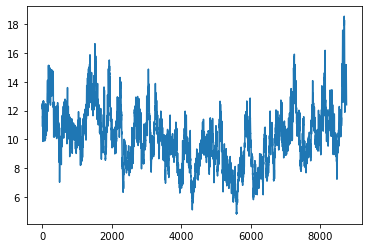

In [10]:
plt.plot(L_CONTOUR['2010']/1e6)

tgb - 10/17/2019 - Blindly copy Julia's new calculation of the contour length to compare with the "naive" calculation done for preliminary results

In [2]:
# Choose year over which to calculate the contour length
year = 2010

# Initial imports
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import datetime
from skimage import measure
from scipy import ndimage
import scipy.integrate as sin
from scipy.optimize import curve_fit

import pickle
import sys

# Open MSE dataset
path = '/nfs/twcroninlab002/tbeucler/ERA5/ERA5_LHF_SHF/'
MSE = xr.open_mfdataset(path+'????/??MSE.nc',combine='by_coords')

# Restrict to Tropical Atlantic MSE field
dx = 110/4 #km
dt = 3600
tcoor = dt*np.arange(0,MSE.time.shape[0])
latmin = -30
latmax = 30
lonmin = 300
lonmax = 360

MSEAtl = MSE['p62.162'].sel({'longitude':slice(lonmin,lonmax),'latitude':slice(latmax,latmin)})
lonAtl = MSE.longitude.sel({'longitude':slice(lonmin,lonmax)})
latAtl = MSE.latitude.sel({'latitude':slice(latmax,latmin)})

# Array containing all years from 2000 to 2018
YEAR = np.linspace(2000,2018,19).astype(int)

# Load median to define the moist margin
path_PKL = '/nfs/twcroninlab002/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
hf = open(path_PKL+'10_1_MED.pkl','rb')
MED_data = pickle.load(hf)

# Find index of a given date
def index_date(time_array,date_string):
    return [i for i, x in enumerate(time_array.sel({'time':date_string})==time_array) if x]

# Iterate over years to calculate total contour length
L_CONTOUR = {}
it_tot = 0
print('year=',year)
date1 = str(year)+'-01-01T00:00:00'
date2 = str(year)+'-12-31T23:00:00'
it_tot = index_date(MSEAtl.time,date1)[0]
Nt = MSEAtl.time.sel({'time':slice(date1,date2)}).shape[0]
L_CONTOUR[str(year)] = np.zeros((Nt,))
for it in range(Nt):
    print('it=',it,' & it_tot=',it_tot,'               ',end='\r')
    
    MSE_tmp = MSEAtl[it_tot,:,:]
    MSE_binary = np.zeros(np.shape(MSE_tmp))
    MSE_binary[MSE_tmp>MED_data['Median_MSE'][str(year)][it]] = 1

    binary_boundary=np.copy(MSE_binary)
    binary_boundary[:,1:-1]=0

    L = dx*(measure.perimeter(MSE_binary,8)- np.sum(binary_boundary))
        
    L_CONTOUR[str(year)][it] = L
    it_tot+=1 
    
# Save the contour length in a pickle file
hf = open(path_PKL+'10_17_CONTOURL'+str(year)+'.pkl','wb')
CONdata = {"Tot_Contour_km":L_CONTOUR,"time":MSEAtl.time}
pickle.dump(CONdata,hf)
hf.close()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
year= 2010


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




KeyboardInterrupt



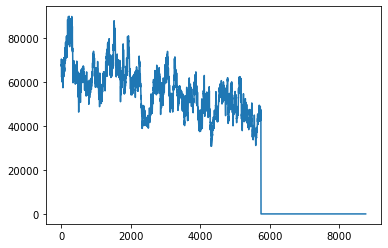

In [3]:
plt.plot(L_CONTOUR[str(year)])